<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyRANDOM</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>RANDOM</b> <b style=color:red;>NUMBERS</b></p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyRANDOM.png"></td>
</tr>
</table>

----
# `pyRANDOM`

pyRANDOM, a collection of jupyter notebooks playing with **random numbers** ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt

----
# Statistics
In this notebook, we recapitulate some simple statistical properties, which we will use later for analysis.

----
## Statistical properties
We define a set of $n$ **data points**, e.g. the discretised temperature values above,  as model vector $x_i$:
$$
x_i = (x_1,x_2,\dots,x_n)^T, \quad i=1,n
$$

If we want to describe the **likelihood** that a certain number is taken out of the entire set, and
we assume that the chance to draw a certain number is equal for all numbers, we can define the
**probability** as
$$
p_i = {{1} \over{n}}, \quad i=1,n
$$

Next, we then define the **arithmetic mean** $\mu$ of the distribution as:
$$\fbox{$
\mu = \sum\limits_{i} x_i p_i = {{1} \over{n}} \sum\limits_{i} x_i
$}$$

The **variance** of the distribution is:
$$
\sigma^2 = \frac{1}{n} \sum\limits_{i}  \big( x_i - \mu \big)^2
$$

which we redefine as **standard deviation** $\sigma$ :
$$\fbox{$
\sigma = \sqrt{\frac{1}{n} \sum\limits_{i}  \big( x_i - \mu \big)^2}
$}$$

*Skewness* and *kurtosis*, ...

----
## Example 1: Marks

We have 24 students in a course, and gave marks between 1 and 5.

These marks are listed as array.

We plot the marks as a function of student number, and calculate **mean** and **standard deviation**,
using the `numpy` function `mean()` and `std()`.

In [94]:
students = 24
#rng = np.random.default_rng(seed=43)
#marks = rng.normal(3,1,24).round(0)

marks = np.array([3, 4, 2, 2, 1, 4, 3, 3, 2, 4, 4, 3, 2, 3, 2, 3, 2, 4, 3, 3, 5, 2, 1, 3])
mu    = marks.mean()
sigma = marks.std()

print(marks)
print('mu: ',marks.mean(),' sigma: ',marks.std())

[3 4 2 2 1 4 3 3 2 4 4 3 2 3 2 3 2 4 3 3 5 2 1 3]
mu:  2.8333333333333335  sigma:  0.9860132971832694


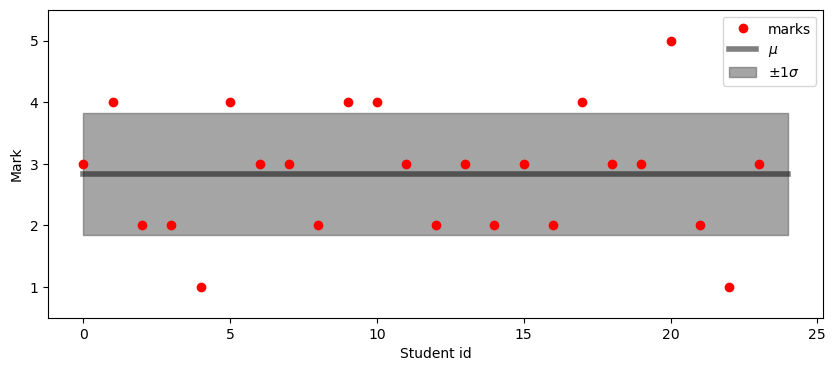

In [95]:
plt.figure(figsize=(10,4))
plt.xlabel('Student id')
plt.ylabel('Mark')
plt.ylim([0.5,5.5])
plt.yticks([1,2,3,4,5])
plt.plot(marks,lw=0,marker='o',color='red',label='marks')
plt.plot([0,students],[mu,mu],lw=4,color='black',alpha=0.5,label='$\mu$')
plt.fill_between([0,students],[mu+sigma,mu+sigma],
                 [mu-sigma,mu-sigma],color=(0.3,0.3,0.3),
                 alpha=0.5,label='$\pm 1 \sigma$')
plt.legend()

We find a **mean** mark of $\mu \simeq 2.8$ with a **standard deviation** of $\sigma \simeq 1$, thus around 68% of 
the students have marks in the range [1.8,3.8].

We now plot the marks as **histogram**. With the histogram, we accumulate the number of students for a specific mark.
We use the `matplotlib.pyplot` function `hist`, which is a bit tedious to tame ...

[2. 7. 9. 5. 1.] [0.5 1.5 2.5 3.5 4.5 5.5] <BarContainer object of 5 artists>


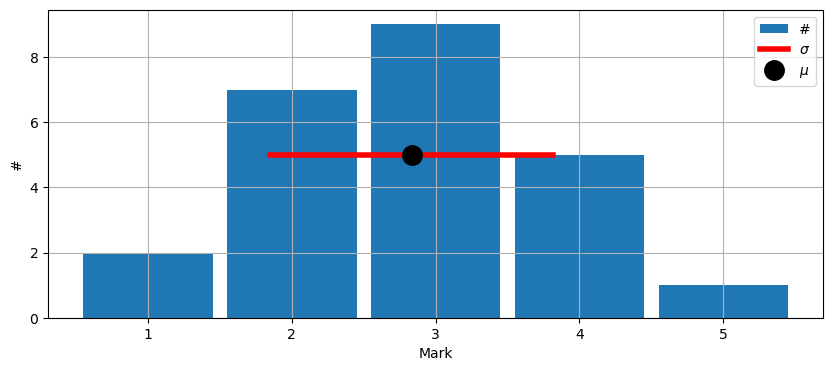

In [96]:
plt.figure(figsize=(10,4))
plt.xlabel('Mark')
plt.ylabel('#')
x,y,z=plt.hist(marks,bins=[0.5,1.5,2.5,3.5,4.5,5.5],rwidth=0.9,label='#')
print(x,y,z)
plt.plot([mu-sigma,mu+sigma],[5,5],lw=4,color='red',label='$\sigma$')
plt.plot(mu,5,lw=0,marker='o',markersize=14,color='black',label='$\mu$')
plt.legend()
plt.grid()

After a closer look at the histogram, we are tempted to fit an exponential through the histogram,
namely a **Gaussian function**:
$$
f(x) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}
$$
The scale will be discussed later ...

In [102]:
def gaussianFunction(x,mu=0,sigma=1):
    # Gauss probability function
    y = 1/(sigma * np.sqrt(2*np.pi)) * np.exp( -((x-mu)/sigma)**2 / 2 )
    return y

[2. 7. 9. 5. 1.] [0.5 1.5 2.5 3.5 4.5 5.5] <BarContainer object of 5 artists>


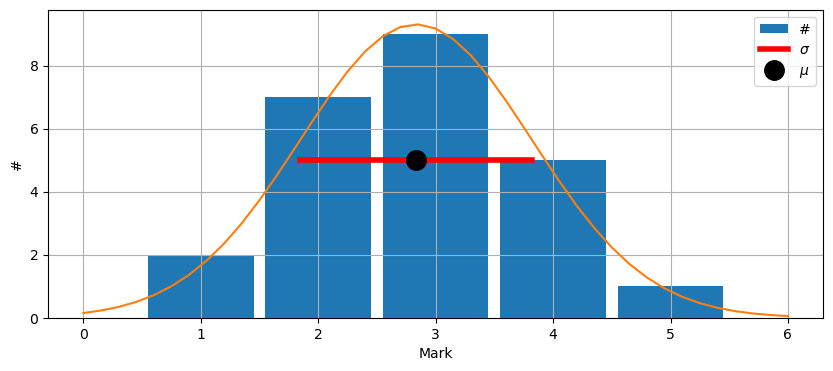

In [108]:
plt.figure(figsize=(10,4))
plt.xlabel('Mark')
plt.ylabel('#')
x,y,z=plt.hist(marks,bins=[0.5,1.5,2.5,3.5,4.5,5.5],rwidth=0.9,label='#')
print(x,y,z)
plt.plot([mu-sigma,mu+sigma],[5,5],lw=4,color='red',label='$\sigma$')
plt.plot(mu,5,lw=0,marker='o',markersize=14,color='black',label='$\mu$')
x = np.linspace(0,6,41)
plt.plot(x,23*gaussianFunction(x,mu,sigma))
plt.legend()
plt.grid()

----
## Example 2: Daily temperatures
We now define another time series:
$$
f(t) = T_{min} + \big( T_{max}-T_{min} \big) \frac{1}{2} \big[ 1 - \cos(2\pi t) \big] 
$$
This example might be a **daily temperature variation** between the 
minimum and maxmum temperatures, $T_{min}$ and $T_{max}$.

We set up the time $t$ [h] axis first ...

In [78]:
timemin  = 0
timemax  = 24
ntime    = 24

time,dtime = np.linspace(timemin,timemax,ntime,retstep=True)
print(time.min(),time.max(),ntime,dtime)

0.0 24.0 24 1.0434782608695652


... then the temporal variation in temperature.

mu:  7.500000000000014  sigma:  8.64580823289528


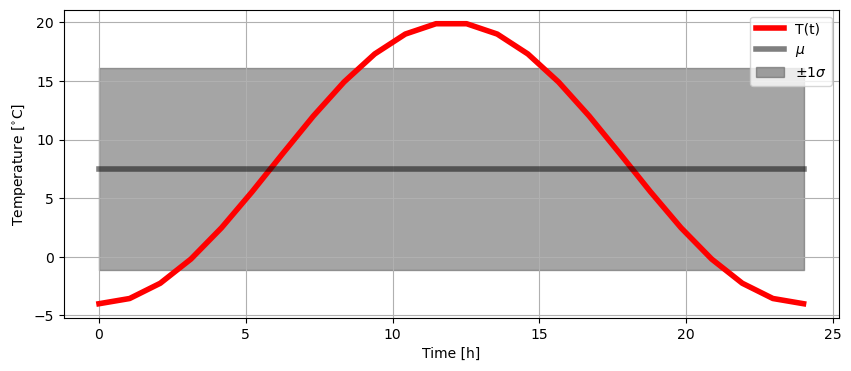

In [82]:
Tmin = -4
Tmax = 20
T = Tmin + (Tmax-Tmin) * (1-np.cos(2*np.pi*time))/2
mu    = T.mean()
sigma = T.std()
print('mu: ',mu,' sigma: ',sigma)

plt.figure(figsize=(10,4))
plt.xlabel('Time [h]')
plt.ylabel('Temperature [$^{\circ}$C]')
plt.plot(time,T,lw=4,color='red',label='T(t)')
plt.plot([time.min(),time.max()],[mu,mu],lw=4,color='black',alpha=0.5,label='$\mu$')
plt.fill_between([time.min(),time.max()],[mu+sigma,mu+sigma],
                 [mu-sigma,mu-sigma],color=(0.3,0.3,0.3),
                 alpha=0.5,label='$\pm 1 \sigma$')
plt.legend()
plt.grid()

We find a **mean** temperature of $\mu \simeq 7.5$ with a **standard deviation** of $\sigma \simeq 8.6$, thus around 68% of 
the temperatures lie in the range [-1.1,16.1], a very wide probability range!.

We now plot the temperatures as **histogram**:

[6. 4. 2. 2. 2. 2. 6.] [-4.         -0.57142857  2.85714286  6.28571429  9.71428571 13.14285714
 16.57142857 20.        ] <BarContainer object of 7 artists>


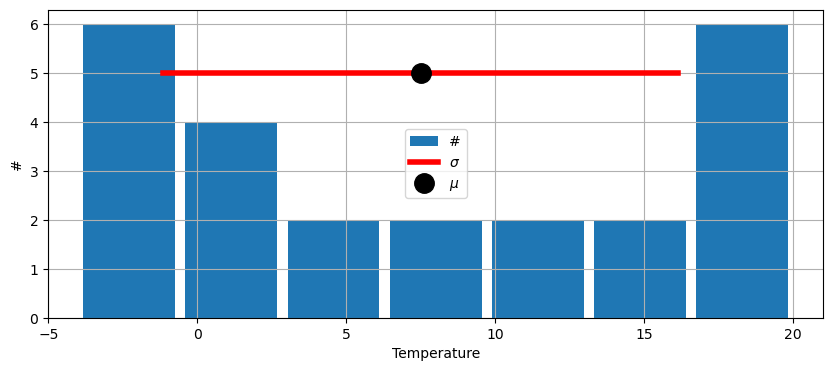

In [92]:
plt.figure(figsize=(10,4))
plt.xlabel('Temperature')
plt.ylabel('#')
x,y,z=plt.hist(T,bins=np.linspace(Tmin,Tmax,8),rwidth=0.9,label='#')
print(x,y,z)
plt.plot([mu-sigma,mu+sigma],[5,5],lw=4,color='red',label='$\sigma$')
plt.plot(mu,5,lw=0,marker='o',markersize=14,color='black',label='$\mu$')
plt.legend()
plt.grid()

In the case of the daily temperatures, we find a **bi-modal** distribution ...

----